<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/GPU_bench_marking_with_image_classification_%7C_Deep_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras



In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/10_gpu_benchmarking/'

Exercise					       small_images.jpg
gpu_performance_test_small_image_classification.ipynb


In [4]:
tf.config.experimental.list_physical_devices() # check if you have GPU

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [7]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
# create a function to plot images on screen instead of writing the entire code again and again
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

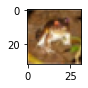

In [13]:
plot_sample(0)

In [14]:
# rename the y labels as classes
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [15]:
# checking the name of the class at the index position

classes[y_train[0][0]]

'frog'

In [16]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [18]:
# doing one hot encoding of the y variable to make numeric to categorical variable
y_train_categorical = keras.utils.to_categorical(y_train, num_classes=10,dtype='float32')
y_test_categorical = keras.utils.to_categorical(y_test, num_classes=10,dtype='float32')

In [ ]:
# model building

model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(3072,activation='relu'),
                          keras.layers.Dense(1000,activation='relu'),                                                    
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

model.compile(optimizer='SGD',loss = 'categorical_crossentropy',metrics=['accuracy']) # we have to use only categorical cross entropy here as we have made our y variable already categorical, agar woh nahi kiya hota toh fir we will use sparse categorical cross entropy
model.fit(x_train_scaled,y_train_categorical, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 81s 51ms/step - loss: 1.8448 - accuracy: 0.3433
Epoch 2/50
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6617 - accuracy: 0.4138
Epoch 3/50
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5742 - accuracy: 0.4462
Epoch 4/50
1563/1563 [==============================] - 74s 48ms/step - loss: 1.5144 - accuracy: 0.4656
Epoch 5/50
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4644 - accuracy: 0.4828
Epoch 6/50
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4223 - accuracy: 0.4991
Epoch 7/50
1563/1563 [==============================] - 78s 50ms/step - loss: 1.3844 - accuracy: 0.5123
Epoch 8/50
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3501 - accuracy: 0.5231
Epoch 9/50
1563/1563 [==============================] - 82s 53ms/step - loss: 1.3177 - accuracy: 0.5351
Epoch 10/50
 375/1563 [======>.......................] - ETA: 1:

In [ ]:
classes[np.argmax(model.predict(x_test_scaled)[0])]

In [ ]:
classes[y_test[0][0]]

In [ ]:
model.evaluate(x_test_scaled, y_test_categorical)

In [ ]:
# now we will run the performance test on the model for GPU vs CPU
def get_model():
  model = keras.Sequential([keras.layers.Flatten(input_shape=(32,32,3)),
                          keras.layers.Dense(3072,activation='relu'),
                          keras.layers.Dense(1000,activation='relu'),                                                    
                          keras.layers.Dense(10,activation='sigmoid')
                          ])

  model.compile(optimizer='SGD',loss = 'categorical_crossentropy',metrics=['accuracy']) # we have to use only categorical cross entropy here as we have made our y variable already categorical, agar woh nahi kiya hota toh fir we will use sparse categorical cross entropy
  return model
  

In [ ]:
%%timeit -n -r1
with tf.device('/physical_device:CPU:0'):
  cpu_model= get_model()
  cpu_model.fit(x_train_scaled,y_train_categorical, epochs=1)

In [ ]:
%%timeit -n -r1
with tf.device('/physical_device:GPU:0'):
  gpu_model= get_model()
  gpu_model.fit(x_train_scaled,y_train_categorical, epochs=1)

# ***Exercise***

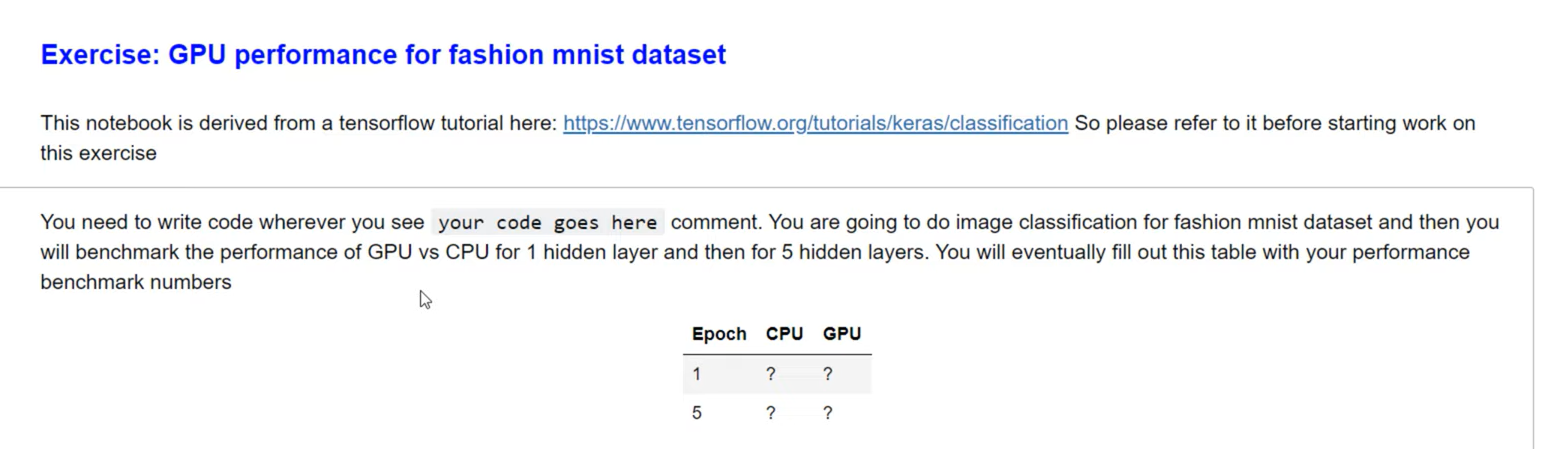